# Get data from Copernicus Climate Data Store

In [1]:
#pip install netcdf4
#pip install netCDF4

In [5]:
import cdsapi
import netCDF4
import xarray as xr
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

plt.rc('font', size=14)  # Set default font size for all text
plt.rc('axes', titlesize=16)  # Set default size for axes titles
plt.rc('axes', labelsize=16)  # Set default size for axis labels

## ORAS5 global ocean reanalysis monthly data from 1958 to present

### Load multiple datasets

In [2]:
months = 4

lon_all = []
lat_all = []
ssh_all = []
ssh_new_all = []
date_all = []

for i in range(months):
    ds = xr.open_dataset('copernicus-data/sossheig_control_monthly_highres_2D_20140'+ str(i+1) +'_CONS_v0.1.nc')
    print(f'Loading for month {i+1}')
    #print(ds.variables.keys())

    # Extracting the variables
    lon = ds['nav_lon'][0,:]
    lat = ds['nav_lat'][:,0]
    ssh = ds['sossheig'][0,:,:]
    time = ds['time_counter']

    # Fixing the longitude
    idx = np.where(np.diff(lon) < 0)[0][0]
    ssh_new = np.concatenate([ssh[:,idx:], ssh[:,:idx]], axis=1)

    # Extracting the date
    dt = np.datetime64(time[0].values)
    date = dt.astype('datetime64[D]')

    # Appending the variables to the list
    lon_all.append(lon)
    lat_all.append(lat)
    ssh_all.append(ssh)
    ssh_new_all.append(ssh_new)
    date_all.append(date)



c:\Users\Matteo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\backends\plugins.py:110: RuntimeWarning: Engine 'cfgrib' loading failed:
ecCodes library not found using ['eccodes', 'libeccodes.so', 'libeccodes']
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)


Loading for month 1
Loading for month 2
Loading for month 3
Loading for month 4


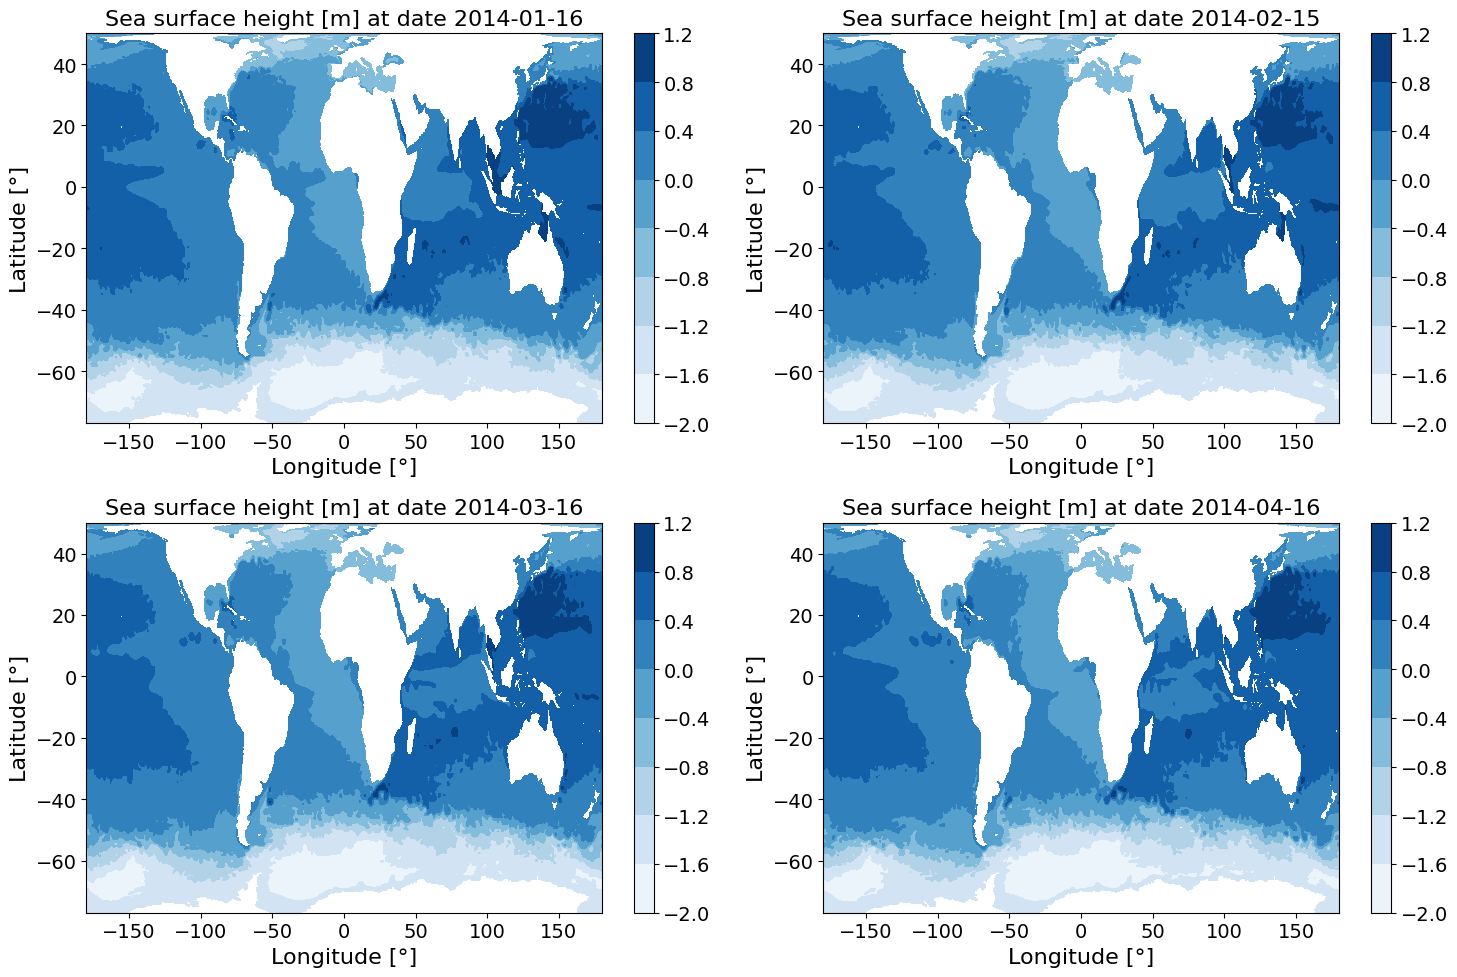

In [7]:
save = 0

# Plot the SSH field for several months
plt.figure(figsize=(15, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.contourf(np.sort(lon_all[i]), lat_all[i], ssh_new_all[i], cmap='Blues')
    plt.colorbar()
    plt.title('Sea surface reference height [m] at date '+str(date_all[i]))
    plt.xlabel('Longitude [°]')
    plt.ylabel('Latitude [°]')

plt.tight_layout()

if save:
    plt.savefig('plots/ssh_field.pdf', format='pdf')

plt.show()
    

The sea surface height is the vertical distance between the actual sea surface and a reference surface of constant geopotential with which mean sea level would coincide if the ocean were at rest. This variable is a 2D field.

### Load a single dataset

In [307]:
dataset = Dataset('copernicus-data/sossheig_control_monthly_highres_2D_201401_CONS_v0.1.nc')
print(dataset.variables.keys())

lat = dataset.variables['nav_lat'][:][:,0]
lon = dataset.variables['nav_lon'][:][0,:]
ssh = dataset.variables['sossheig'][:][0,:,:]
time = '201401'

print(f'The max value of lat is {np.max(lat)} and the min value is {np.min(lat):.3f}')
print(f'The max value of lon is {np.max(lon)} and the min value is {np.min(lon)}')
print(f'The max value of ssh is {np.max(ssh):.3f} and the min value is {np.min(ssh):.3f}')

print(f'The shape of lat is {lat.shape}')
print(f'The shape of lon is {lon.shape}')
print(f'The shape of ssh is {ssh.shape}')

dict_keys(['nav_lat', 'nav_lon', 'sossheig', 'time_counter'])
The max value of lat is 50.0 and the min value is -77.010
The max value of lon is 180.0 and the min value is -179.75
The max value of ssh is 1.050 and the min value is -1.934
The shape of lat is (1021,)
The shape of lon is (1442,)
The shape of ssh is (1021, 1442)


In [281]:
#plt.plot(lon,'.')
# Find idx where it changes
idx = np.where(np.diff(lon)<0)[0]
print(f'The idx where lon changes is {idx}')

ssh_new  = np.concatenate((ssh[:, idx[0]:], ssh[:, :idx[0]] ), axis=1)
ssh_new = np.where(ssh_new == 9.96921e+36, np.nan, ssh_new)
ssh_new.shape
print(np.max(ssh_new), np.min(ssh_new))

The idx where lon changes is [429]
9.96921e+36 -1.9026423


In [282]:
ssh_new = np.where(ssh_new == 9.96921e+36, np.nan, ssh_new)
print(np.max(ssh_new), np.min(ssh_new))

nan nan


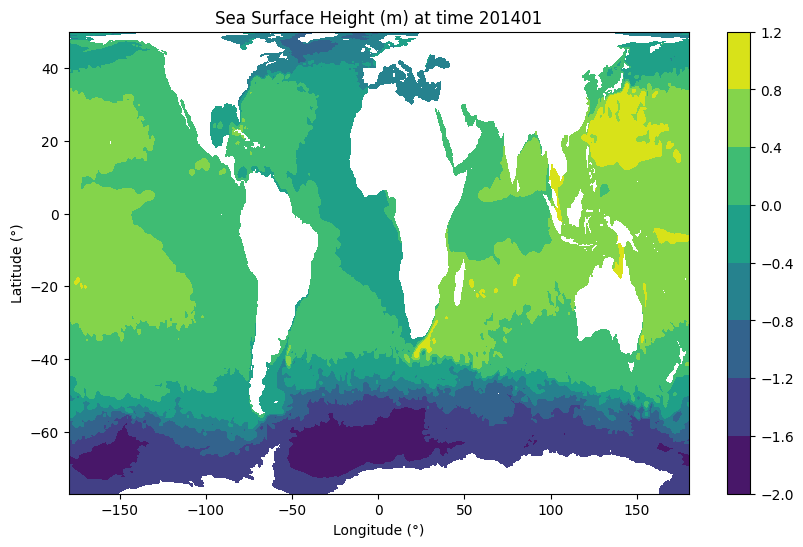

In [283]:
lon = np.sort(lon)
LON, LAT = np.meshgrid(lon, lat)

# Get min and max values of axes
x_min, x_max = LON.min(), LON.max()
y_min, y_max = LAT.min(), LAT.max()

# Plot the SSH field
plt.figure(figsize=(10, 6))
plt.contourf(LON, LAT, ssh_new)
plt.colorbar()
plt.title('Sea Surface Height (m) at time ' + time)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')

plt.show()

The sea surface height is the vertical distance between the actual sea surface and a reference surface of constant geopotential with which mean sea level would coincide if the ocean were at rest. This variable is a 2D field.

## Sea level gridded data from satellite observations for the global ocean from 1993 to present

In [272]:
dataset = Dataset('copernicus-data/dt_global_twosat_phy_l4_20230908_vDT2021.nc')
print(dataset.variables.keys())

dict_keys(['crs', 'time', 'latitude', 'lat_bnds', 'longitude', 'lon_bnds', 'nv', 'sla', 'err_sla', 'ugosa', 'err_ugosa', 'vgosa', 'err_vgosa', 'adt', 'ugos', 'vgos', 'tpa_correction', 'flag_ice'])


In [273]:
time = dataset.variables['time']
lat = dataset.variables['latitude']
lon = dataset.variables['longitude']
lat.shape, lon.shape

((720,), (1440,))

In [274]:
sla = dataset.variables['sla'][0,:,:]
print(sla.shape)

(720, 1440)


In [275]:
LON, LAT = np.meshgrid(lon, lat)

print(LAT.shape)
print(LON.shape)


(720, 1440)
(720, 1440)


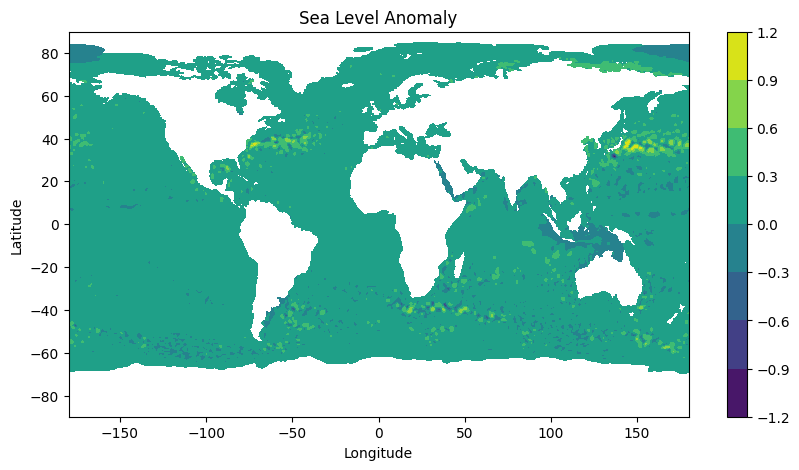

In [276]:
LON, LAT = np.meshgrid(lon, lat)

plt.figure(figsize=(10, 5))
plt.contourf(LON, LAT, sla)
plt.colorbar()
plt.title('Sea Level Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [277]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

In [19]:
# Assuming `lon`, `lat`, and `sla` are your data arrays
LON, LAT = np.meshgrid(lon, lat)

LON = LON[::10, ::10] # Take every 10th point to speed up the process
LAT = LAT[::10, ::10] # Take every 10th point to speed up the process

# Convert latitude and longitude to radians
lon_rad = np.radians(LON)
lat_rad = np.radians(LAT)

# Define the radius of the Earth (in meters or a normalized sphere, e.g., radius = 1)
R = 1

# Convert spherical coordinates (lon, lat) to Cartesian coordinates (x, y, z)
X = R * np.cos(lat_rad) * np.cos(lon_rad)
Y = R * np.cos(lat_rad) * np.sin(lon_rad)
Z = R * np.sin(lat_rad)

In [20]:
X.shape, Y.shape, Z.shape

((72, 144), (72, 144), (72, 144))

In [21]:
sla = sla[::10, ::10] # Take every 10th point to speed up the process

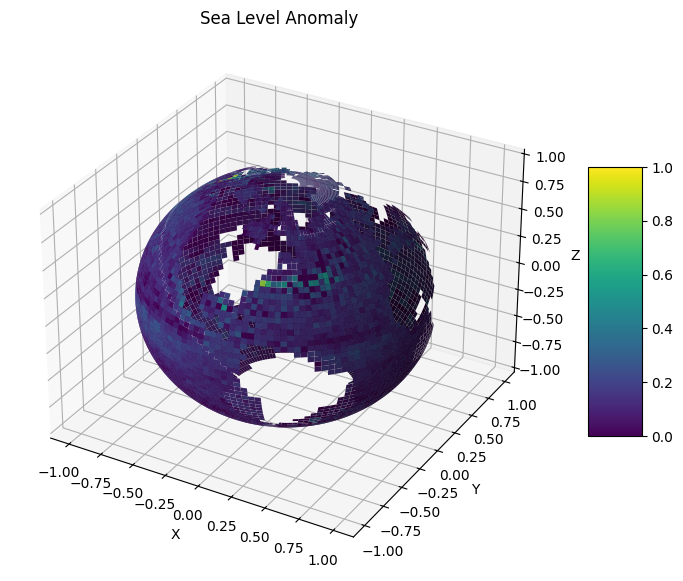

In [22]:
# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(sla), rstride=1, cstride=1, linewidth=0, antialiased=True)
ax.set_title('Sea Level Anomaly')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

## ERA5 hourly data on single levels from 1940 to present

In [ ]:
# Open the nc file
dataset = Dataset('EC-Earth3P-HR_historical_waterlevel_2014_09_v1.nc')
 
print(dataset.variables.keys())
waterlevel = dataset.variables['waterlevel'][:]
x = dataset.variables['station_x_coordinate'][:]
y = dataset.variables['station_y_coordinate'][:]

In [24]:
time = dataset.variables['time'][:]
print(time.shape)
stations = dataset.variables['stations'][:]
print(stations.shape)

(4320,)
(43119,)


In [25]:
print(f'The shape of the waterlevel array is {waterlevel.shape}')
print(f'The shape of the x array is {x.shape}')
print(f'The shape of the y array is {y.shape}')

print(f'The min value of the waterlevel array is {np.min(waterlevel)}')
print(f'The max value of the waterlevel array is {np.max(waterlevel)}')

print(f'The min value of the x array is {np.min(x)}')
print(f'The max value of the x array is {np.max(x)}')

print(f'The min value of the y array is {np.min(y)}')
print(f'The max value of the y array is {np.max(y)}')


The shape of the waterlevel array is (4320, 43119)
The shape of the x array is (43119,)
The shape of the y array is (43119,)
The min value of the waterlevel array is -7.079
The max value of the waterlevel array is 8.562
The min value of the x array is -179.985
The max value of the x array is 179.95600000000002
The min value of the y array is -84.712
The max value of the y array is 83.65


In [26]:
n = 500

x_subset = x[:n]
y_subset = y[:n]

waterlevel_subset = waterlevel[:n, :n]

In [27]:
#waterlevel_subset[0]

In [28]:
# x for the stations under x[i] < -150
x_subset = x[x < -150]
y_subset = y[y > 75]

# Get the corresponding waterlevel values
x_subset.shape
y_subset.shape

(398,)

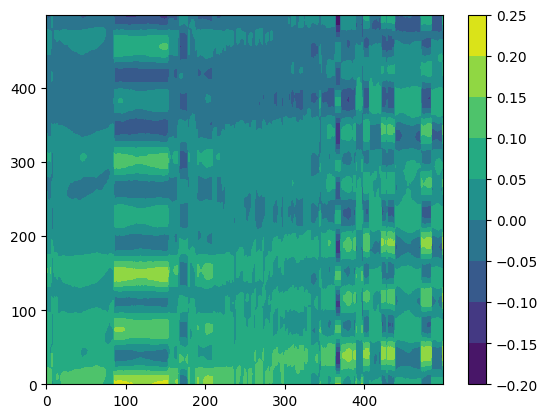

In [49]:
X, Y = np.meshgrid(x_subset, y_subset)

plt.contourf(waterlevel_subset)
plt.colorbar()

In [ ]:
#X, Y = np.meshgrid(x, y)

#plt.contourf(X, Y, waterlevel[0,:,:])

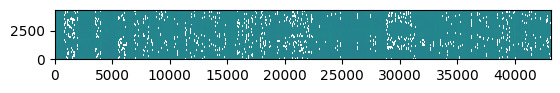

In [ ]:
#plt.imshow(waterlevel, cmap='viridis', origin='lower')

## Geopotential - ERA5 hourly data on pressure levels from 1940 to present

In [ ]:
if 0:  
  c = cdsapi.Client()

  dataset = 'reanalysis-era5-pressure-levels'

  request = {
        'product_type': ['reanalysis'],
        'variable': ['geopotential'],
        'year': ['2024'],
        'month': ['03'],
        'day': ['01'],
        'time': ['13:00'],
        'pressure_level': ['1000'],
        'data_format': 'netcdf',
    }
  target = 'download.nc'

  c.retrieve(dataset, request, target)

In [ ]:
# Open the NetCDF file
dataset = Dataset('download.nc')

In [ ]:
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2024-11-07T03:28 GRIB to CDM+CF via cfgrib-0.9.14.1/ecCodes-2.36.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["oper"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(1), pressure_level(1), latitude(721), longitude(1440)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 pressure_level(pressure_level), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(), float32 z(valid_time, pressure_level, latitude, longitude)
    groups: 


In [ ]:
print(dataset.variables.keys())

dict_keys(['number', 'valid_time', 'pressure_level', 'latitude', 'longitude', 'expver', 'z'])


In [ ]:
lats = dataset.variables['latitude'][:]
lons = dataset.variables['longitude'][:]
time = dataset.variables['valid_time'][:]
z = dataset.variables['z'][:]

In [ ]:
print(f'The smallest latitude is {lats.min()} and the largest latitude is {lats.max()}')
print(f'Then length of the latitude array is {len(lats)}')

print(f'The smallest longitude is {lons.min()} and the largest longitude is {lons.max()}')
print(f'Then length of the longitude array is {len(lons)}')

print(f'The smallest z is {z.min()} and the largest z is {z.max()}')
print(f'The shape of the z array is {z.shape}')

The smallest latitude is -90.0 and the largest latitude is 90.0
Then length of the latitude array is 721
The smallest longitude is 0.0 and the largest longitude is 359.75
Then length of the longitude array is 1440
The smallest z is -4286.60546875 and the largest z is 3106.39453125
The shape of the z array is (1, 1, 721, 1440)


In [ ]:
z = dataset.variables['z'][:]
print(z.shape)
number = dataset.variables['number'][:]
p = dataset.variables['pressure_level'][:]
p.shape
expver = dataset.variables['expver'][:] 
expver


(1, 1, 721, 1440)


'0001'

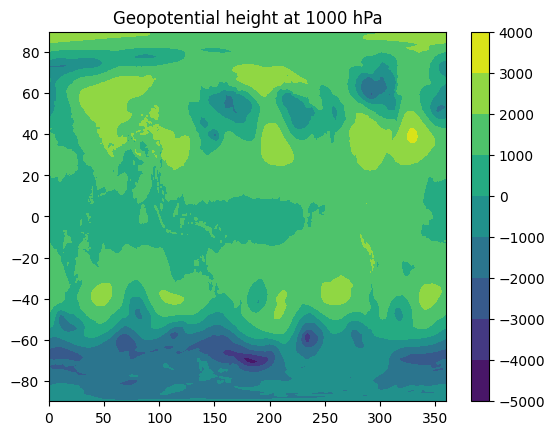

In [ ]:
# Plot
lon, lat = np.meshgrid(lons, lats)

plt.contourf(lon, lat, z[0,0,:,:])
plt.title('Geopotential height at 1000 hPa')
plt.colorbar()
plt.show()